In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
lr=LogisticRegression()

lr.fit(X_train,y_train).score(X_train,y_train)

0.9

In [4]:
pred=lr.predict(X_test)
prob=lr.predict_proba(X_test)[::,1]

In [5]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[418  73]
 [ 95 414]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       491
           1       0.85      0.81      0.83       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



0.832

In [6]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc )

AUC: 0.87


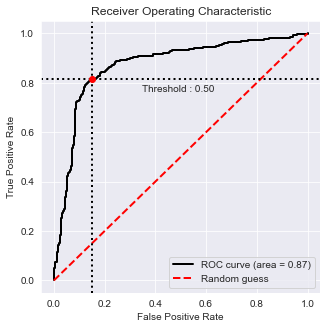

In [7]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [8]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.8133595284872298

In [9]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.8313253012048192
